CUSTOMER PURCHASE BEHAVIOR - PCA ANALYSIS

1. DATASET OVERVIEW
--------------------------------------------------------------------------------
Dataset Shape: (10, 4)
Number of Customers: 10
Number of Features: 4

First few rows:
   Time_spent  Clicks  Product_Views  Purchase_Frequency
0           5       3              4                   0
1          10       7              9                   1
2          15      12             14                   2
3          20      18             20                   3
4          25      25             28                   5
5          30      30             35                   6
6          18      15             17                   2
7          22      20             23                   4
8           8       5              6                   1
9          28      27             30                   5

2. STATISTICAL SUMMARY
--------------------------------------------------------------------------------
       Time_spent     Clicks  Product_

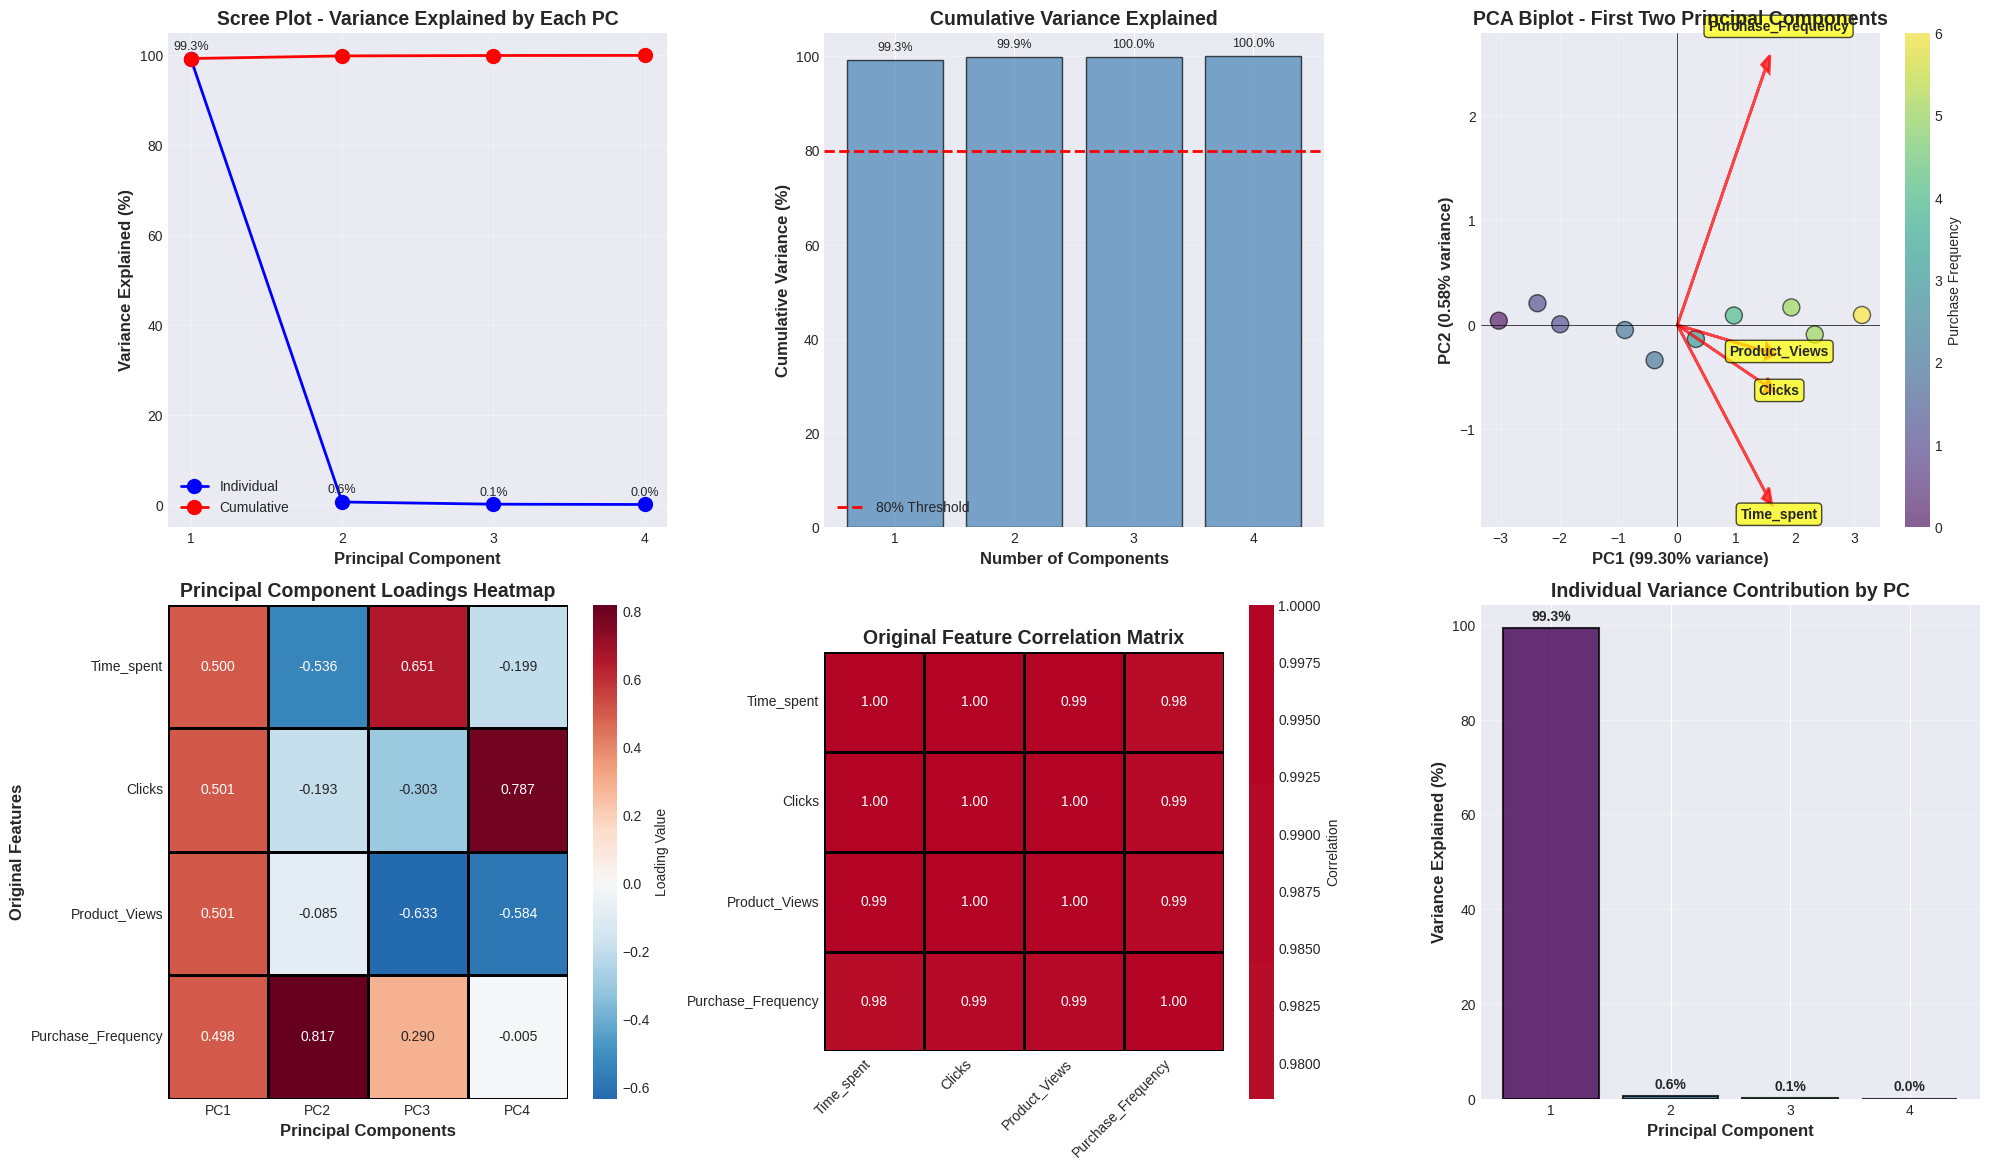

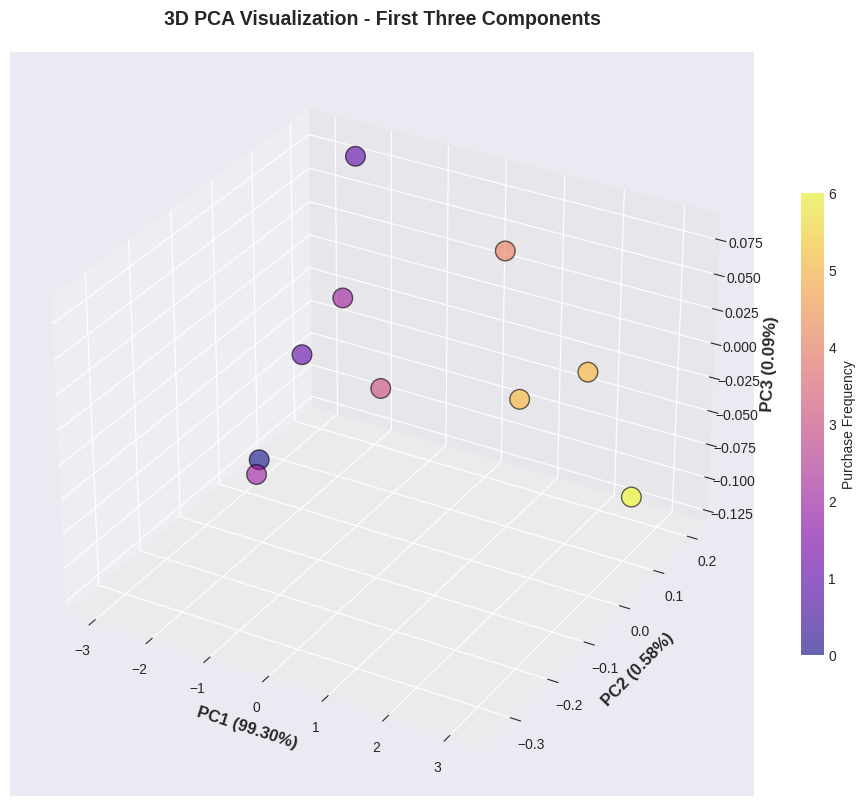

In [1]:
"""
Principal Component Analysis (PCA) on Customer Purchase Behavior
E-commerce Company - Dimensionality Reduction Analysis
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("CUSTOMER PURCHASE BEHAVIOR - PCA ANALYSIS")
print("="*80)

# Load the dataset
df = pd.read_csv('/home/nmit/Documents/customer_Dataset.csv')

print("\n1. DATASET OVERVIEW")
print("-" * 80)
print(f"Dataset Shape: {df.shape}")
print(f"Number of Customers: {df.shape[0]}")
print(f"Number of Features: {df.shape[1]}")
print("\nFirst few rows:")
print(df.head(10))

print("\n2. STATISTICAL SUMMARY")
print("-" * 80)
print(df.describe())

print("\n3. DATA PREPROCESSING")
print("-" * 80)
# Check for missing values
print(f"Missing values:\n{df.isnull().sum()}")

# Feature matrix
X = df.values
feature_names = df.columns.tolist()
print(f"\nFeature Names: {feature_names}")
print(f"Original Feature Matrix Shape: {X.shape}")

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Scaled Feature Matrix Shape: {X_scaled.shape}")
print("\nStandardization completed - Mean: 0, Std: 1")

# Display scaling parameters
print("\nScaling Parameters:")
for i, feature in enumerate(feature_names):
    print(f"  {feature}: Mean = {scaler.mean_[i]:.2f}, Std = {scaler.scale_[i]:.2f}")

print("\n4. APPLYING PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("-" * 80)

# Apply PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get variance explained by each component
variance_explained = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_explained)

print(f"Number of Principal Components: {pca.n_components_}")
print("\nVariance Explained by Each Component:")
for i, var in enumerate(variance_explained):
    print(f"  PC{i+1}: {var*100:.2f}% (Cumulative: {cumulative_variance[i]*100:.2f}%)")

print(f"\nTotal Variance Explained: {cumulative_variance[-1]*100:.2f}%")

# Principal Component Loadings
print("\n5. PRINCIPAL COMPONENT LOADINGS")
print("-" * 80)
print("(How much each original feature contributes to each PC)")
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)
print(loadings)

# Determine optimal number of components (80% variance threshold)
optimal_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f"\n6. OPTIMAL NUMBER OF COMPONENTS")
print("-" * 80)
print(f"Components needed to explain 80% variance: {optimal_components}")

# Apply PCA with optimal components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)
print(f"Reduced Data Shape: {X_pca_optimal.shape}")

print("\n7. INTERPRETATION OF PRINCIPAL COMPONENTS")
print("-" * 80)

for i in range(min(3, pca.n_components_)):
    print(f"\nPC{i+1} (Explains {variance_explained[i]*100:.2f}% of variance):")
    component_loadings = pca.components_[i]
    sorted_indices = np.argsort(np.abs(component_loadings))[::-1]
    
    print("  Most influential features:")
    for idx in sorted_indices:
        print(f"    - {feature_names[idx]}: {component_loadings[idx]:.4f}")

print("\n" + "="*80)
print("GENERATING VISUALIZATIONS...")
print("="*80)

# Create comprehensive visualizations
fig = plt.figure(figsize=(20, 12))

# 1. Scree Plot - Variance Explained
ax1 = plt.subplot(2, 3, 1)
plt.plot(range(1, len(variance_explained) + 1), variance_explained * 100, 
         'bo-', linewidth=2, markersize=10, label='Individual')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, 
         'ro-', linewidth=2, markersize=10, label='Cumulative')
plt.xlabel('Principal Component', fontsize=12, fontweight='bold')
plt.ylabel('Variance Explained (%)', fontsize=12, fontweight='bold')
plt.title('Scree Plot - Variance Explained by Each PC', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.xticks(range(1, len(variance_explained) + 1))
for i, (var, cum_var) in enumerate(zip(variance_explained, cumulative_variance)):
    plt.text(i+1, var*100 + 2, f'{var*100:.1f}%', ha='center', fontsize=9)

# 2. Cumulative Variance Explained
ax2 = plt.subplot(2, 3, 2)
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, 
        color='steelblue', alpha=0.7, edgecolor='black')
plt.axhline(y=80, color='r', linestyle='--', linewidth=2, label='80% Threshold')
plt.xlabel('Number of Components', fontsize=12, fontweight='bold')
plt.ylabel('Cumulative Variance (%)', fontsize=12, fontweight='bold')
plt.title('Cumulative Variance Explained', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(range(1, len(cumulative_variance) + 1))
for i, cum_var in enumerate(cumulative_variance):
    plt.text(i+1, cum_var*100 + 2, f'{cum_var*100:.1f}%', ha='center', fontsize=9)

# 3. PCA Biplot (if we have at least 2 components)
if pca.n_components_ >= 2:
    ax3 = plt.subplot(2, 3, 3)
    
    # Plot data points
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                         c=df['Purchase_Frequency'], 
                         cmap='viridis', s=150, alpha=0.6, 
                         edgecolors='black', linewidth=1)
    
    # Plot feature vectors
    scale_factor = 3
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, 
                 pca.components_[0, i] * scale_factor, 
                 pca.components_[1, i] * scale_factor,
                 head_width=0.15, head_length=0.15, 
                 fc='red', ec='red', linewidth=2, alpha=0.7)
        plt.text(pca.components_[0, i] * scale_factor * 1.15, 
                pca.components_[1, i] * scale_factor * 1.15,
                feature, fontsize=10, ha='center', fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    plt.colorbar(scatter, label='Purchase Frequency')
    plt.xlabel(f'PC1 ({variance_explained[0]*100:.2f}% variance)', 
              fontsize=12, fontweight='bold')
    plt.ylabel(f'PC2 ({variance_explained[1]*100:.2f}% variance)', 
              fontsize=12, fontweight='bold')
    plt.title('PCA Biplot - First Two Principal Components', 
             fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linewidth=0.5)
    plt.axvline(x=0, color='k', linewidth=0.5)

# 4. Component Loadings Heatmap
ax4 = plt.subplot(2, 3, 4)
sns.heatmap(loadings, annot=True, fmt='.3f', cmap='RdBu_r', 
           center=0, cbar_kws={'label': 'Loading Value'},
           linewidths=1, linecolor='black')
plt.title('Principal Component Loadings Heatmap', fontsize=14, fontweight='bold')
plt.xlabel('Principal Components', fontsize=12, fontweight='bold')
plt.ylabel('Original Features', fontsize=12, fontweight='bold')

# 5. Feature Correlation Matrix (Original Data)
ax5 = plt.subplot(2, 3, 5)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
           cmap='coolwarm', center=0, square=True,
           linewidths=1, linecolor='black',
           cbar_kws={'label': 'Correlation'})
plt.title('Original Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 6. Explained Variance by Component (Bar Chart)
ax6 = plt.subplot(2, 3, 6)
colors = plt.cm.viridis(np.linspace(0, 1, len(variance_explained)))
bars = plt.bar(range(1, len(variance_explained) + 1), 
              variance_explained * 100,
              color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
plt.xlabel('Principal Component', fontsize=12, fontweight='bold')
plt.ylabel('Variance Explained (%)', fontsize=12, fontweight='bold')
plt.title('Individual Variance Contribution by PC', fontsize=14, fontweight='bold')
plt.xticks(range(1, len(variance_explained) + 1))
plt.grid(True, alpha=0.3, axis='y')
for i, (bar, var) in enumerate(zip(bars, variance_explained)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{var*100:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('/home/nmit/Pictures/pca_analysis_comprehensive.png', 
            dpi=300, bbox_inches='tight')
print("\n✓ Comprehensive visualization saved!")

# Additional 3D visualization if we have at least 3 components
if pca.n_components_ >= 3:
    fig2 = plt.figure(figsize=(12, 10))
    ax = fig2.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                        c=df['Purchase_Frequency'], cmap='plasma',
                        s=200, alpha=0.6, edgecolors='black', linewidth=1)
    
    ax.set_xlabel(f'PC1 ({variance_explained[0]*100:.2f}%)', 
                 fontsize=12, fontweight='bold')
    ax.set_ylabel(f'PC2 ({variance_explained[1]*100:.2f}%)', 
                 fontsize=12, fontweight='bold')
    ax.set_zlabel(f'PC3 ({variance_explained[2]*100:.2f}%)', 
                 fontsize=12, fontweight='bold')
    ax.set_title('3D PCA Visualization - First Three Components', 
                fontsize=14, fontweight='bold', pad=20)
    
    fig2.colorbar(scatter, ax=ax, label='Purchase Frequency', shrink=0.6)
    plt.savefig('/home/nmit/Pictures/pca_3d_visualization.png', 
                dpi=300, bbox_inches='tight')
    print("✓ 3D visualization saved!")

# Create a detailed results summary
print("\n" + "="*80)
print("ANALYSIS SUMMARY & RESULTS")
print("="*80)

summary_text = f"""
CUSTOMER PURCHASE BEHAVIOR - PCA ANALYSIS SUMMARY
{'='*80}

1. DATASET INFORMATION
   - Total Customers Analyzed: {df.shape[0]}
   - Original Features: {df.shape[1]}
   - Features: {', '.join(feature_names)}

2. DIMENSIONALITY REDUCTION RESULTS
   - Principal Components Generated: {pca.n_components_}
   - Optimal Components (80% variance): {optimal_components}
   - Data Reduction: {df.shape[1]} → {optimal_components} dimensions
   - Compression Ratio: {(1 - optimal_components/df.shape[1])*100:.1f}%

3. VARIANCE EXPLAINED
"""

for i, (var, cum_var) in enumerate(zip(variance_explained, cumulative_variance)):
    summary_text += f"   PC{i+1}: {var*100:.2f}% (Cumulative: {cum_var*100:.2f}%)\n"

summary_text += f"""
4. KEY INSIGHTS

   a) Most Important Component (PC1):
      - Explains {variance_explained[0]*100:.2f}% of total variance
      - Represents the primary pattern in customer behavior
      
   b) Feature Importance in PC1:
"""

pc1_loadings = pca.components_[0]
sorted_indices = np.argsort(np.abs(pc1_loadings))[::-1]
for idx in sorted_indices:
    summary_text += f"      • {feature_names[idx]}: {pc1_loadings[idx]:.4f}\n"

summary_text += f"""
   c) Interpretation:
      - The features with highest absolute loadings in PC1 are the most
        influential in explaining customer purchase patterns
      - Positive loadings indicate features that increase together
      - Negative loadings indicate inverse relationships

5. RECOMMENDATIONS
   - Use PC1 and PC2 (if needed) for customer segmentation
   - Focus on features with highest loadings for business decisions
   - The reduced dimensions can be used for clustering or classification
   - Dimensionality reduction achieved: {optimal_components} components capture
     {cumulative_variance[optimal_components-1]*100:.1f}% of information

{'='*80}
Analysis completed successfully!
"""

print(summary_text)

# Save the summary
with open('/home/nmit/Pictures/pca_analysis_summary.txt', 'w') as f:
    f.write(summary_text)
print("\n✓ Analysis summary saved!")

# Save transformed data
transformed_df = pd.DataFrame(
    X_pca_optimal,
    columns=[f'PC{i+1}' for i in range(optimal_components)]
)
transformed_df.to_csv('/home/nmit/Pictures/transformed_customer_data.csv', index=False)
print("✓ Transformed data saved!")

# Save loadings
loadings.to_csv('/home/nmit/Pictures/pca_loadings.csv')
print("✓ PCA loadings saved!")

print("\n" + "="*80)
print("ALL OUTPUTS SAVED SUCCESSFULLY!")
print("="*80)
print("\nFiles generated:")
print("1. pca_analysis_comprehensive.png - Main visualization")
print("2. pca_3d_visualization.png - 3D scatter plot")
print("3. pca_analysis_summary.txt - Detailed text summary")
print("4. transformed_customer_data.csv - Reduced dimensionality data")
print("5. pca_loadings.csv - Component loadings matrix")
